In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
## Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [8]:
X.shape

(243, 11)

In [9]:
y.shape

(243,)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [45]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [11]:
scaler=StandardScaler()

<Axes: >

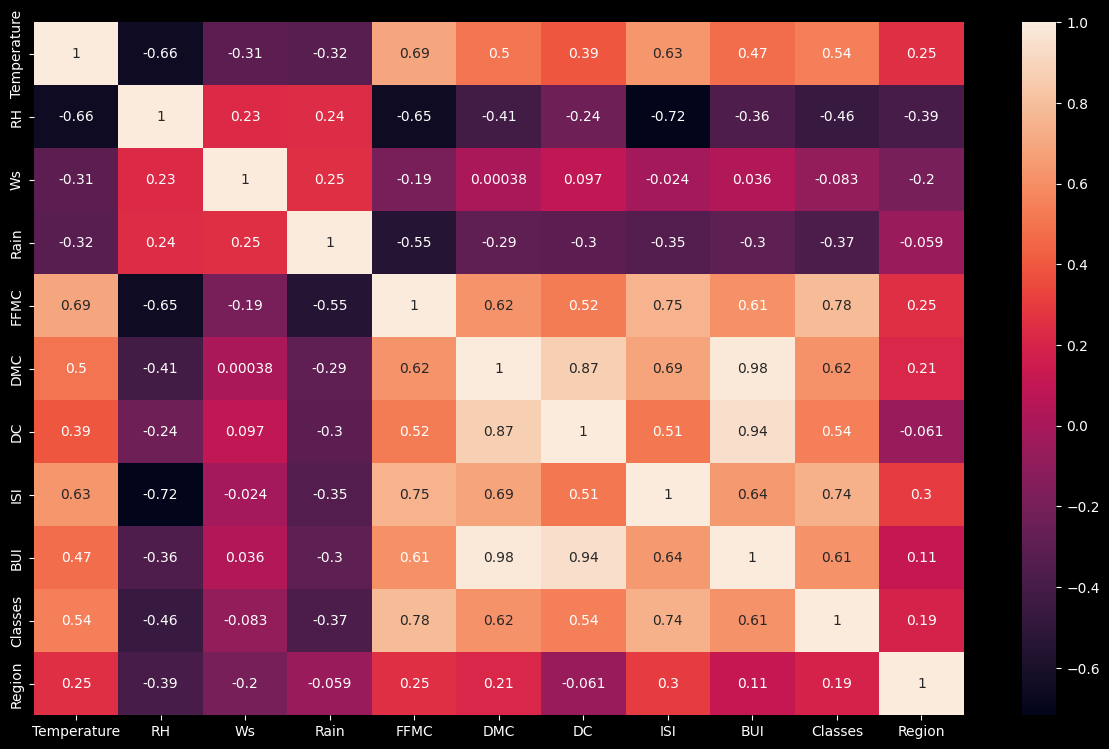

In [12]:
## Checking for multicollinearity in the indpendent features
corr=X_train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)

In [13]:
def corr_thres(dataset,threshold):
    corr_mat=dataset.corr()
    col_corr=set()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                col_name=corr_mat.columns[i]
                col_corr.add(col_name)
    return col_corr


In [14]:
corr_thres(X_train,0.85)

{'BUI', 'DC'}

In [15]:
## drop the above features
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test_scaled)

In [20]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 0.5468236465249978
R2 score: 0.9847657384266951


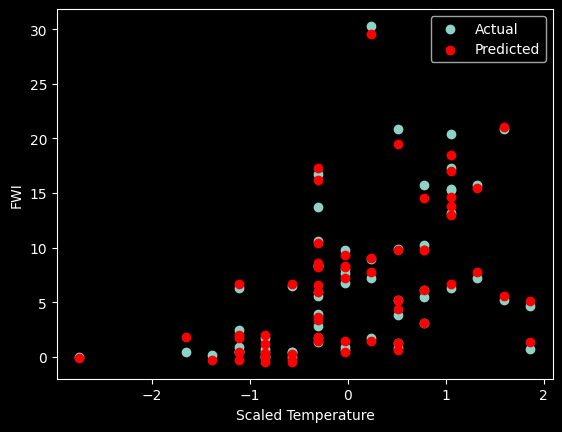

In [21]:
# Use the first feature for plotting
plt.scatter(X_test_scaled[:, 0], y_test, label='Actual')
plt.scatter(X_test_scaled[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Scaled Temperature')
plt.ylabel('FWI')
plt.legend()
plt.show()

In [22]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

Lasso()

In [23]:
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


In [24]:
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 1.133175994914409
R2 score: 0.9492020263112388


In [25]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [26]:
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 0.5642305340105715
R2 score: 0.9842993364555512


In [27]:
elasticnet=ElasticNet()

In [28]:
elasticnet.fit(X_train_scaled,y_train)

ElasticNet()

In [29]:
y_pred=elasticnet.predict(X_test_scaled)

In [30]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 1.8822353634896005
R2 score: 0.8753460589519703


## Cross-Validation

In [31]:
lcv=LassoCV()

In [32]:
lcv.fit(X_train_scaled,y_train)

LassoCV()

In [33]:
y_pred=lcv.predict(X_test_scaled)

In [34]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 0.619970115826343
R2 score: 0.9820946715928275


In [35]:
rcv=RidgeCV()

In [36]:
rcv.fit(X_train_scaled,y_train)

RidgeCV()

In [37]:
y_pred=rcv.predict(X_test_scaled)

In [38]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 0.5642305340106358
R2 score: 0.9842993364555516


In [39]:
ecv=ElasticNetCV()

In [40]:
ecv.fit(X_train_scaled,y_train)

ElasticNetCV()

In [41]:
y_pred=ecv.predict(X_test_scaled)

In [42]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}")
print(f"R2 score: {r2}")


Mean Absolute error: 0.6575946731430898
R2 score: 0.9814217587854941


In [43]:
import pickle

In [44]:
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))